# Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

Make at least three different classification models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best as possible. Consider if the flight arrived late or not (ArrDelay > 0).

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("DelayedFlights.csv", index_col = 0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The data consists of flight arrival and departure details for all commercial flights within the USA. Variable descriptions:
* 1 Year; 2008 
* 2 Month; 1-12 
* 3 DayofMonth; 1-31 
* 4 DayOfWeek; 1 (Monday) - 7 (Sunday) 
* 5 DepTime; actual departure time (local, hhmm) 
* 6 CRSDepTime; scheduled departure time (local, hhmm) 
* 7 ArrTime; actual arrival time (local, hhmm) 
* 8 CRSArrTime; scheduled arrival time (local, hhmm) 
* 9 UniqueCarrier; unique carrier code 
* 10 FlightNum; flight number 
* 11 TailNum; plane tail number 
* 12 ActualElapsedTime; in minutes 
* 13 CRSElapsedTime; in minutes 
* 14 AirTime; in minutes 
* 15 ArrDelay; arrival delay, in minutes 
* 16 DepDelay; departure delay, in minutes 
* 17 Origin; origin IATA airport code 
* 18 Dest; destination IATA airport code 
* 19 Distance; in miles 
* 20 TaxiIn; taxi in time, in minutes 
* 21 TaxiOut; taxi out time in minutes 
* 22 Cancelled; was the flight cancelled? 
* 23 CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* 24 Diverted; 1 = yes, 0 = no 
* 25 CarrierDelay; in minutes 
* 26 WeatherDelay; in minutes 
* 27 NASDelay; in minutes 
* 28 SecurityDelay; in minutes 
* 29 LateAircraftDelay; in minutes

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


We are first deleting some columns that are not needed. The Year column, that is always 2008; the Cancelled column, as well as the rows that have cancelled = 1, because those are of no interest if we are studying delay; the CancellationCode column, for the same reasons; the Diverted column, as well as the rows that have diverted = 1, because those are of no interest if we are studying delay; and the Origin and Dest because they add no real information that the column Distance doesn't provide, as well as the TailNum column.

In [17]:
#remove the Year column
df = df.drop(["Year"], axis = 1)

#keep only rows that were not cancelled
df = df[df.Cancelled == 0]

#remove the Cancelled row
df = df.drop(["Cancelled"], axis = 1)

#remove CancellationCode column
df = df.drop(["CancellationCode"], axis = 1)

#keep only rows that were not diverted
df = df[df.Diverted == 0]

#remove the Diverted row
df = df.drop(["Diverted"], axis = 1)

#remove the Origin, Dest, and TailNum row
df = df.drop(["Origin", "Dest", "TailNum"], axis = 1)

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


We are now going to take care of the NaN values as well.

In [6]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [7]:
df[df["ArrDelay"] <= 0].count()

Month                204956
DayofMonth           204956
DayOfWeek            204956
DepTime              204956
CRSDepTime           204956
ArrTime              204956
CRSArrTime           204956
UniqueCarrier        204956
FlightNum            204956
ActualElapsedTime    204956
CRSElapsedTime       204956
AirTime              204956
ArrDelay             204956
DepDelay             204956
Distance             204956
TaxiIn               204956
TaxiOut              204956
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

The large number of NaN values don't coincide with an arrival delay of 0 or less, so filling those values with 0 would cause to skew the models. Since they take up such a large percentage of the dataset, removing them would cause a notable loss of information. Perhaps the best option would be to fill them with either the mean or the median.

In [8]:
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]
  ].describe().round(2)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,19.18,3.70,15.02,0.09,25.30
std,43.55,21.49,33.83,2.02,42.05
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,2.00,0.00,8.00
75%,21.00,0.00,15.00,0.00,33.00
max,2436.00,1352.00,1357.00,392.00,1316.00


Out of the two options, filling with the median seems to be the best one, because there are very big values that skew the mean higher than the majority of the data.

In [18]:
#filling NaN values in these columns with their median
df["CarrierDelay"] = df["CarrierDelay"].fillna(df["CarrierDelay"].median())
df["WeatherDelay"] = df["WeatherDelay"].fillna(df["WeatherDelay"].median())
df["NASDelay"] = df["NASDelay"].fillna(df["NASDelay"].median())
df["SecurityDelay"] = df["SecurityDelay"].fillna(df["SecurityDelay"].median())
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(df["LateAircraftDelay"].median())

Next we will transform the ArrDelay into categorical data. If there is delay (ArrDelay > 0), it will be True, and if there is no delay (ArrDelay <= 0), it will be False. This new column will be called Late. 

In [19]:
df["Late"] = df["ArrDelay"] > 0
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Late
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,8.0,810,4.0,8.0,2.0,0.0,2.0,0.0,8.0,False
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,19.0,810,5.0,10.0,2.0,0.0,2.0,0.0,8.0,True
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,8.0,515,3.0,17.0,2.0,0.0,2.0,0.0,8.0,True
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,True
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,25.0,688,4.0,10.0,2.0,0.0,2.0,0.0,8.0,True


Having created the new column, we will now create our models. We will not use all of the dataset as it is too big, and not all of the columns have any correlation to the one we want to predict. 

[Text(0.5, 1.0, 'Correlations')]

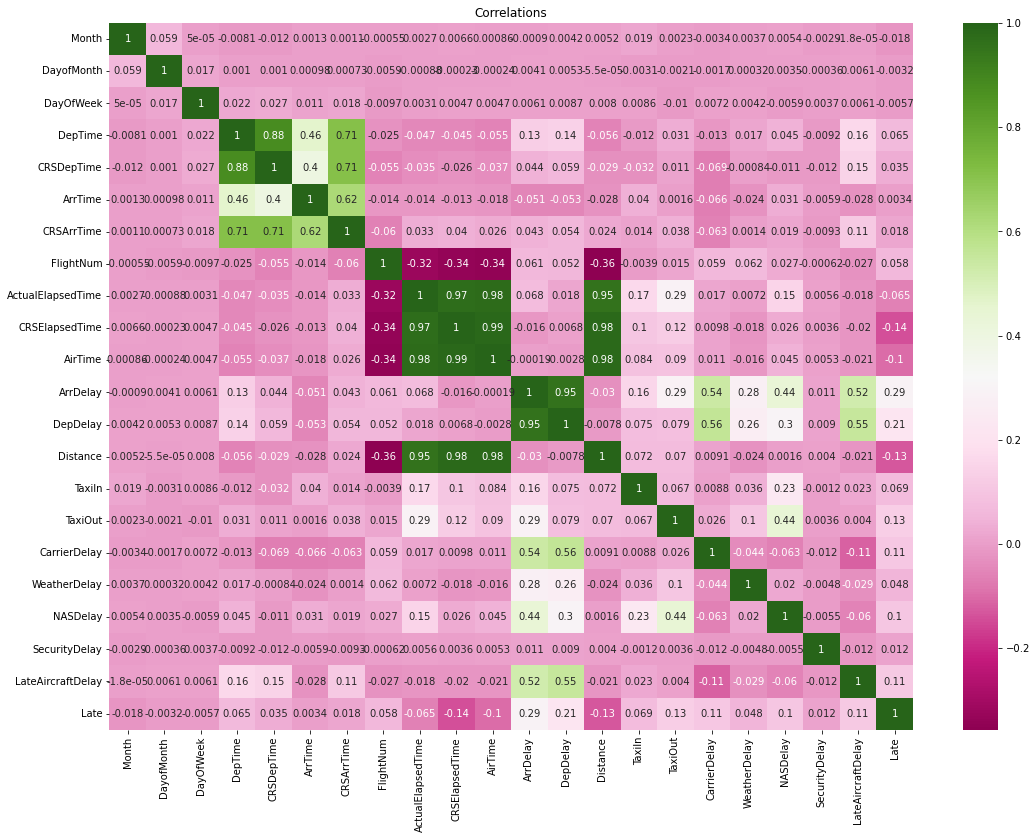

In [20]:
plt.figure(figsize = (18, 13))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG").set(
    title = "Correlations")

We will pick DepDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay.

In [21]:
X = df[["DepDelay", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
               "LateAircraftDelay"]]
y = df[["ArrDelay"]]

In [ ]:
from sklearn.neural_network import MLPClassifier

#training 
mlp = MLPClassifier()
mlp.fit(X, y)

pred_nn = mlp.predict(X)